In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('ushape.csv')

In [8]:
df.head()

,X,Y,class
0,0.455,0.365,1
1,0.350,0.265,0
2,0.530,0.420,0
3,0.440,0.365,1
4,0.330,0.255,1


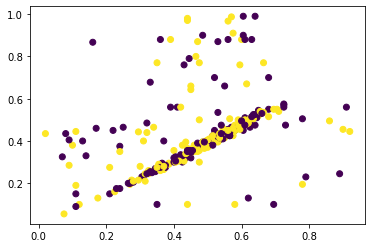

In [11]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2023-04-04 08:59:41.886600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# using tanh activation function

In [14]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


2023-04-04 09:00:59.009184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Set parameters to 0
model.get_weights()

[array([[ 0.32556176, -0.09493709],
        [-0.7042929 ,  0.13088846]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.99095774],
        [-0.60571593]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
initial_weights = model.get_weights()

In [17]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [18]:
model.set_weights(initial_weights)

# weights before training 

In [19]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5410
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5410
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5410
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6930 - val_accuracy: 0.5410
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6930 - val_accuracy: 0.5410
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6929 - val_accuracy: 0.5410
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6929 - val_accuracy: 0.5410
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6925 - val_accuracy: 0.5410
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6925 - val_accuracy: 0.5410
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 66/100
8/8 [===============

# weights after training


In [22]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.02223989], dtype=float32)]

# clearly no change happens in weights


3888/3888 [==============================] - 3s 880us/step


/Users/abc/opt/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

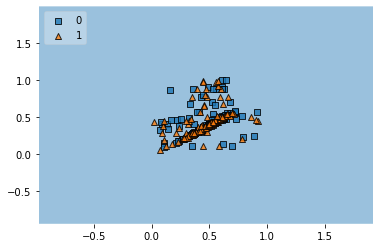

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)